### This script contains the following:

#### 1. Importing libraries and datasets
#### 2. Reducing the dataset and making a decision tree and confusion matrix

### 1. Importing libraries and datasets

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [4]:
# Defining a path for importing/exporting
path = r'/Users/peterguan/ClimateWins ML'

In [5]:
# Importing the Scaled ClimateWins dataset
climatewins_scaled = pd.read_csv(r'/Users/peterguan/ClimateWins ML/climatewins_scaled.csv', index_col = 0)

In [6]:
# Checking if the dataset imported successfully
climatewins_scaled.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.731975,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.731824,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.731673,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.731523,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.731372,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [7]:
# Checking the dimensions of the dataset
climatewins_scaled.shape

(22950, 171)

In [8]:
# Importing the PLEASANT WEATHER dataset
pleasantweather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [9]:
# Checking if the dataset imported successfully 
pleasantweather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Checking the dimensions of the dataset
pleasantweather.shape

(22950, 16)

### 2. Reducing the dataset and making a decision tree

In [12]:
# Reducing to just the temperature variables (excluding Gdansk, Roma,Tours)
climatewins_scaled_reduced = climatewins_scaled[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [13]:
# Creating an 'X' matrix by dropping the DATE and MONTH columns
X = climatewins_scaled_reduced.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

[Text(0.33609268545925514, 0.984375, 'x[14] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.07080055342688105, 0.953125, 'x[29] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106.0, 672.0]\n[9045.0, 1733.0]\n[9508.0, 1270.0]\n[10688.0, 90.0]\n[10778.0, 0.0]\n[10142.0, 636.0]\n[10697.0, 81.0]\n[9817.0, 961.0]\n[10710.0, 68.0]\n[8023.0, 2755.0]\n[10368.0, 410.0]\n[10511.0, 267.0]\n[10778.0, 0.0]\n[10529.0, 249.0]\n[10616.0, 162.0]]'),
 Text(0.02012449100676987, 0.921875, 'x[5] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435.0, 123.0]\n[6871.0, 687.0]\n[7205.0, 353.0]\n[7545.0, 13.0]\n[7558.0, 0.0]\n[7519.0, 39.0]\n[7537.0, 21.0]\n[7340.0, 218.0]\n[7536.0, 22.0]\n[7558.0, 0.0]\n[7414.0, 144.0]\n[7524.0, 34.0]\n[7558.0, 0.0]\n[7536.0, 22.0]\n[7544

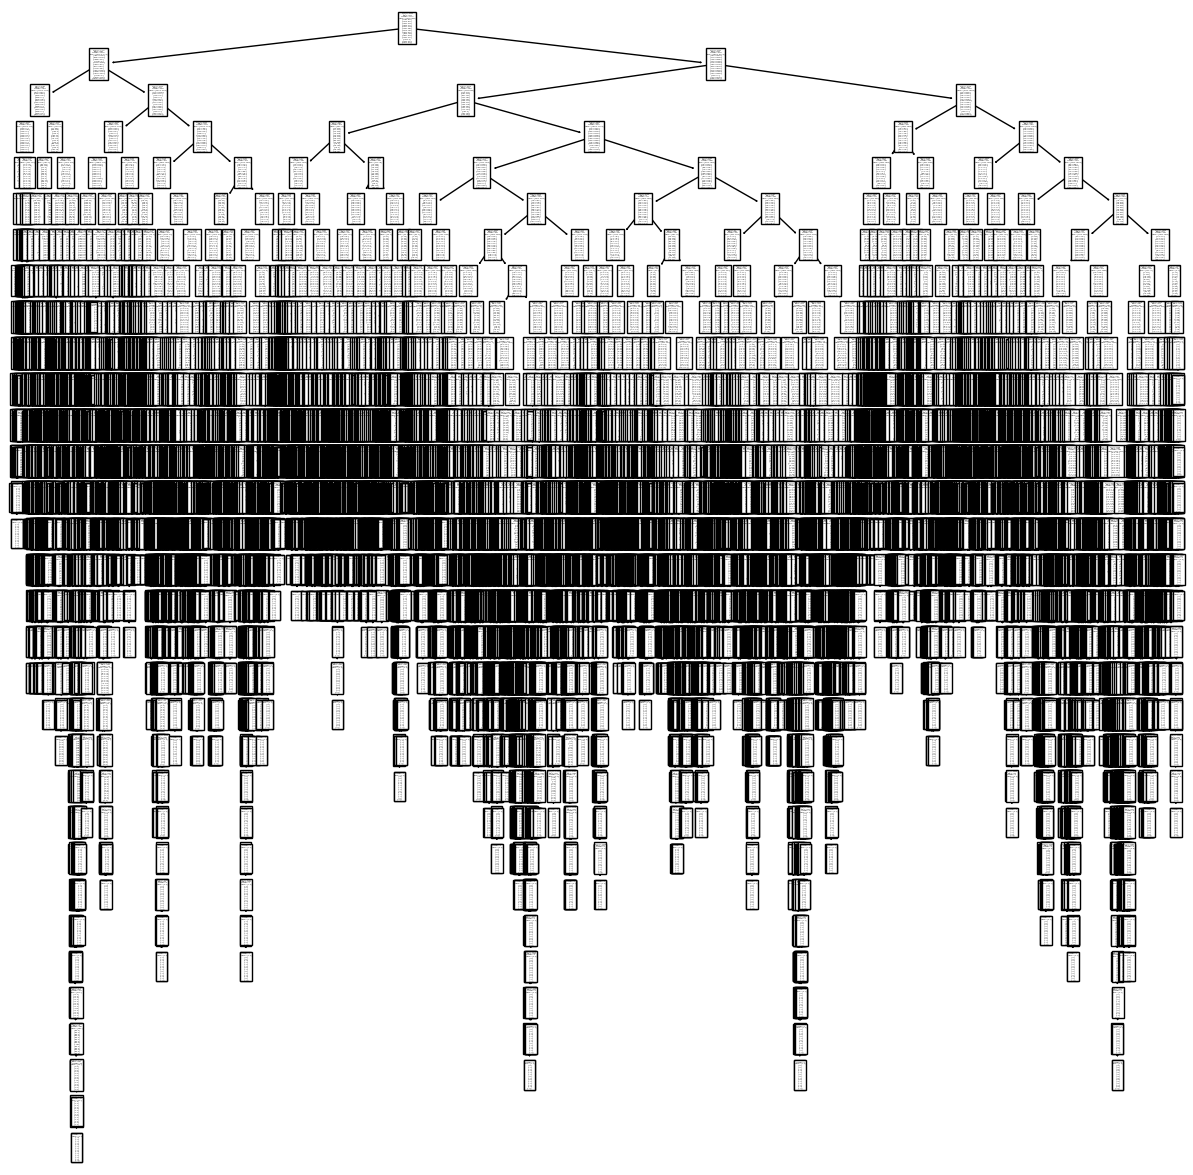

In [15]:
# Running the  Decision Tree classifier
climatewins_scaled_reduced_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
climatewins_scaled_reduced_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(climatewins_scaled_reduced_dt)

In [16]:
# Using the Cross Validation Method to check the train accuracy score
y_pred_train = climatewins_scaled_reduced_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(climatewins_scaled_reduced_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.46310706680228075


In [17]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


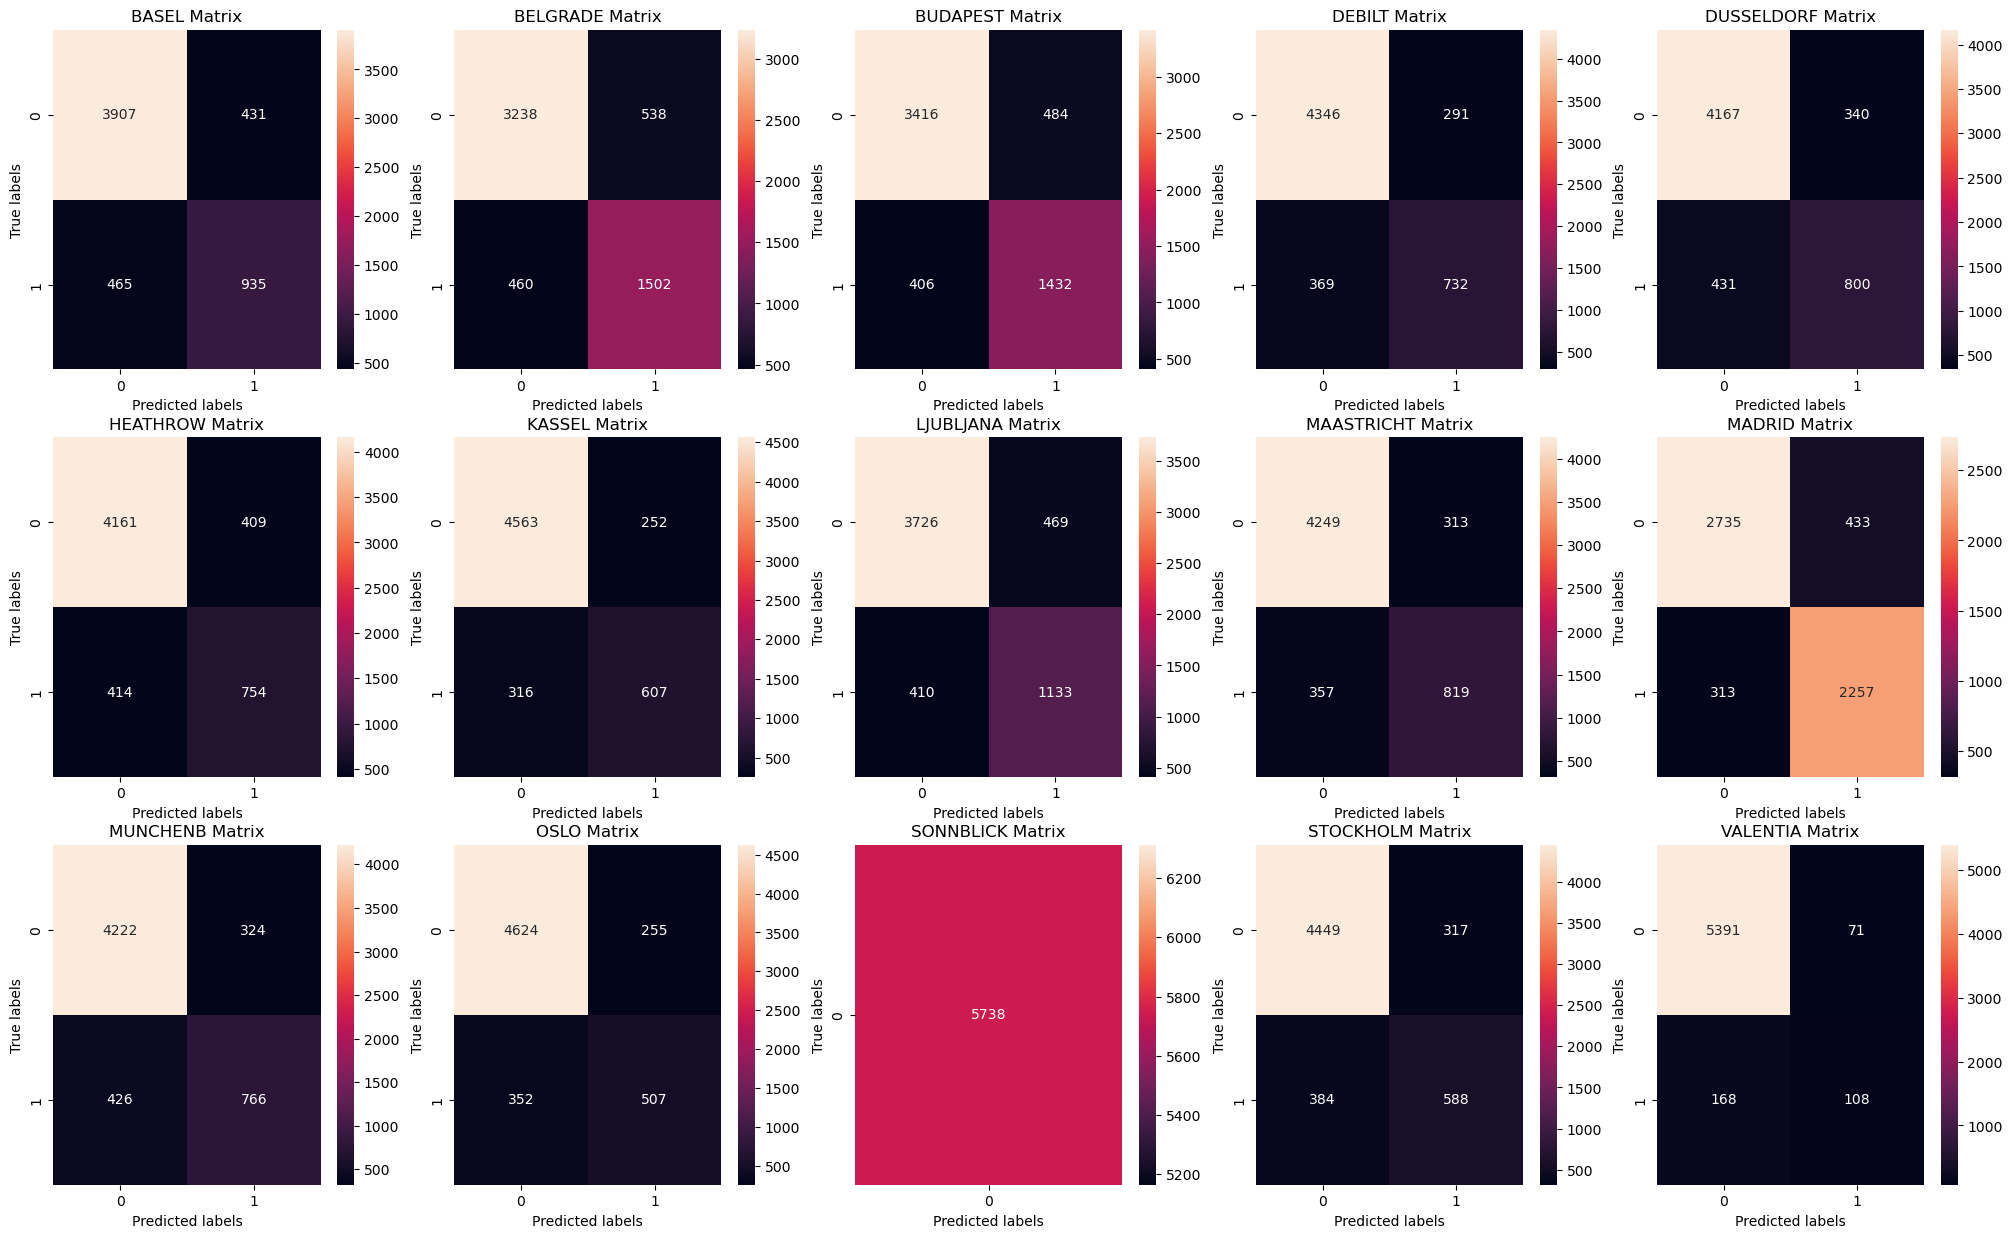

In [18]:
# Creating the confusion matrix (15 matrices)
locations = list({x.split("_")[0] for x in climatewins_scaled_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1